In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Load the dataset
df = pd.read_csv("SuperMarket_Sales.csv")

print("Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist())
print("\nData Types:")
print(df.dtypes)
print("\nFirst 5 rows:")
df.head()

Shape: (1000, 17)

Column Names:
['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Sales', 'Date', 'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating']

Data Types:
Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Sales                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

First 5 rows:


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


In [2]:
print("Missing values per column:")
print(df.isnull().sum())
print("\n" + "="*50)
print("Total rows:", len(df))
print("Columns with missing data:", df.isnull().sum()[df.isnull().sum() > 0].count())

Missing values per column:
Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Sales                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

Total rows: 1000
Columns with missing data: 0


In [3]:
print("Basic statistics for numerical columns:")
df.describe()

Basic statistics for numerical columns:


,Unit price,Quantity,Tax 5%,Sales,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [4]:
print("Detailed dataset information:")
df.info()

Detailed dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64


In [5]:
# Convert Date from text to actual date format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Create new useful columns from the date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Month_Name'] = df['Date'].dt.month_name()
df['Day'] = df['Date'].dt.day
df['Day_of_Week'] = df['Date'].dt.day_name()

# Show the result
print("Date columns created successfully!")
print("\nSample of new columns:")
df[['Date', 'Year', 'Month', 'Month_Name', 'Day', 'Day_of_Week']].head()

Date columns created successfully!

Sample of new columns:


,Date,Year,Month,Month_Name,Day,Day_of_Week
0,2019-01-05,2019,1,January,5,Saturday
1,2019-03-08,2019,3,March,8,Friday
2,2019-03-03,2019,3,March,3,Sunday
3,2019-01-27,2019,1,January,27,Sunday
4,2019-02-08,2019,2,February,8,Friday


In [6]:
# Calculate total revenue (sum of all sales)
total_revenue = df['Sales'].sum()
total_transactions = len(df)
average_sale = df['Sales'].mean()

print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Total Transactions: {total_transactions:,}")
print(f"Average Sale Value: ${average_sale:,.2f}")
print(f"Date Range: {df['Date'].min()} to {df['Date'].max()}")

Total Revenue: $322,966.75
Total Transactions: 1,000
Average Sale Value: $322.97
Date Range: 2019-01-01 00:00:00 to 2019-03-30 00:00:00


In [7]:
print("Branches:", df['Branch'].unique())
print("Number of branches:", df['Branch'].nunique())
print()
print("Cities:", df['City'].unique())
print()
print("Product lines:", df['Product line'].unique())
print("Number of product lines:", df['Product line'].nunique())
print()
print("Payment methods:", df['Payment'].unique())

Branches: ['Alex' 'Giza' 'Cairo']
Number of branches: 3

Cities: ['Yangon' 'Naypyitaw' 'Mandalay']

Product lines: ['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']
Number of product lines: 6

Payment methods: ['Ewallet' 'Cash' 'Credit card']


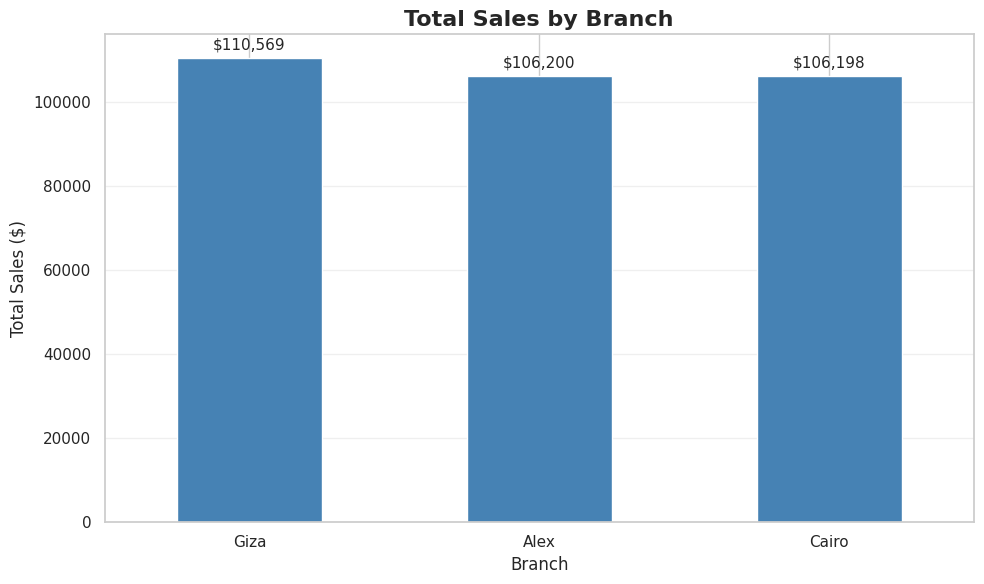


Sales by Branch:
Branch
Giza     110568.7065
Alex     106200.3705
Cairo    106197.6720
Name: Sales, dtype: float64


In [8]:
# Calculate total sales per branch
sales_by_branch = df.groupby('Branch')['Sales'].sum().sort_values(ascending=False)

# Create the bar chart
plt.figure(figsize=(10, 6))
sales_by_branch.plot(kind='bar', color='steelblue')
plt.title('Total Sales by Branch', fontsize=16, fontweight='bold')
plt.xlabel('Branch', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

# Add value labels on top of bars
for i, v in enumerate(sales_by_branch):
    plt.text(i, v + 2000, f'${v:,.0f}', ha='center', fontsize=11)

plt.tight_layout()
plt.show()

print("\nSales by Branch:")
print(sales_by_branch)

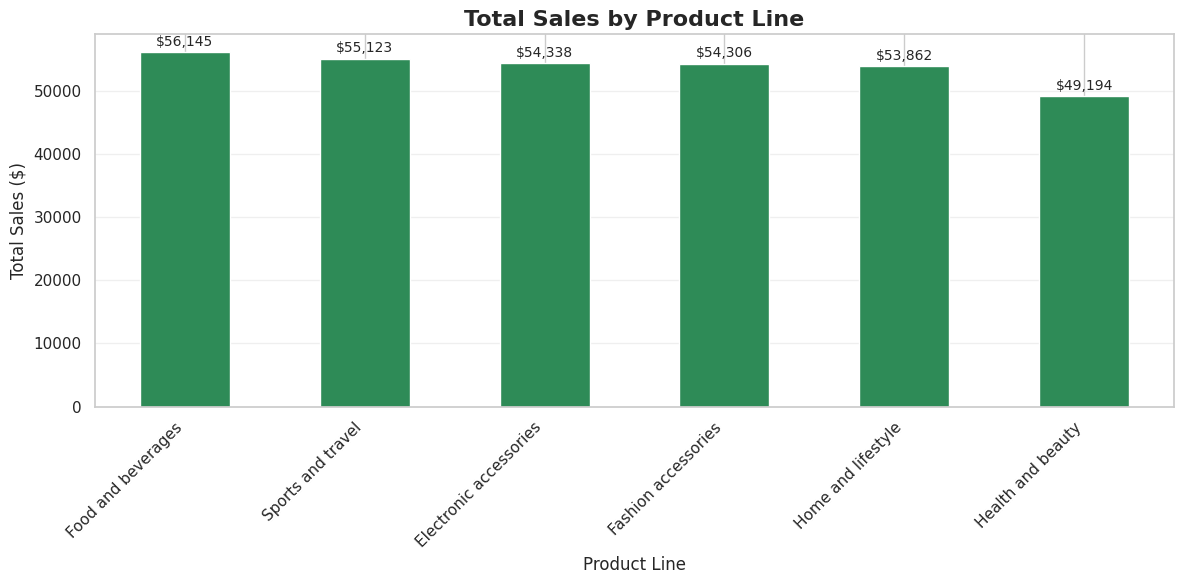


Sales by Product Line:
Product line
Food and beverages        56144.8440
Sports and travel         55122.8265
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Home and lifestyle        53861.9130
Health and beauty         49193.7390
Name: Sales, dtype: float64


In [9]:
# Calculate total sales per product line
sales_by_product = df.groupby('Product line')['Sales'].sum().sort_values(ascending=False)

# Create the bar chart
plt.figure(figsize=(12, 6))
sales_by_product.plot(kind='bar', color='seagreen')
plt.title('Total Sales by Product Line', fontsize=16, fontweight='bold')
plt.xlabel('Product Line', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add value labels on top of bars
for i, v in enumerate(sales_by_product):
    plt.text(i, v + 1000, f'${v:,.0f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

print("\nSales by Product Line:")
print(sales_by_product)

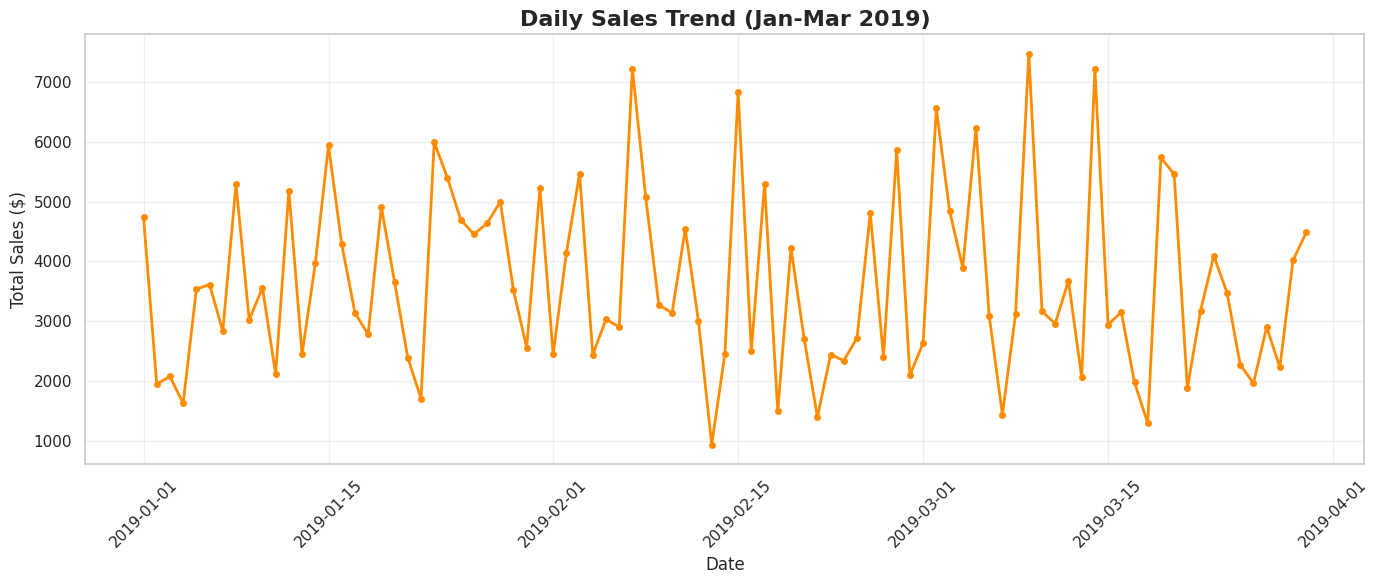


Highest sales day: 2019-03-09 00:00:00 with $7,474.05
Lowest sales day: 2019-02-13 00:00:00 with $934.24


In [10]:
# Calculate daily total sales
daily_sales = df.groupby('Date')['Sales'].sum().sort_index()

# Create the line chart
plt.figure(figsize=(14, 6))
plt.plot(daily_sales.index, daily_sales.values, marker='o', linewidth=2, markersize=4, color='darkorange')
plt.title('Daily Sales Trend (Jan-Mar 2019)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"\nHighest sales day: {daily_sales.idxmax()} with ${daily_sales.max():,.2f}")
print(f"Lowest sales day: {daily_sales.idxmin()} with ${daily_sales.min():,.2f}")

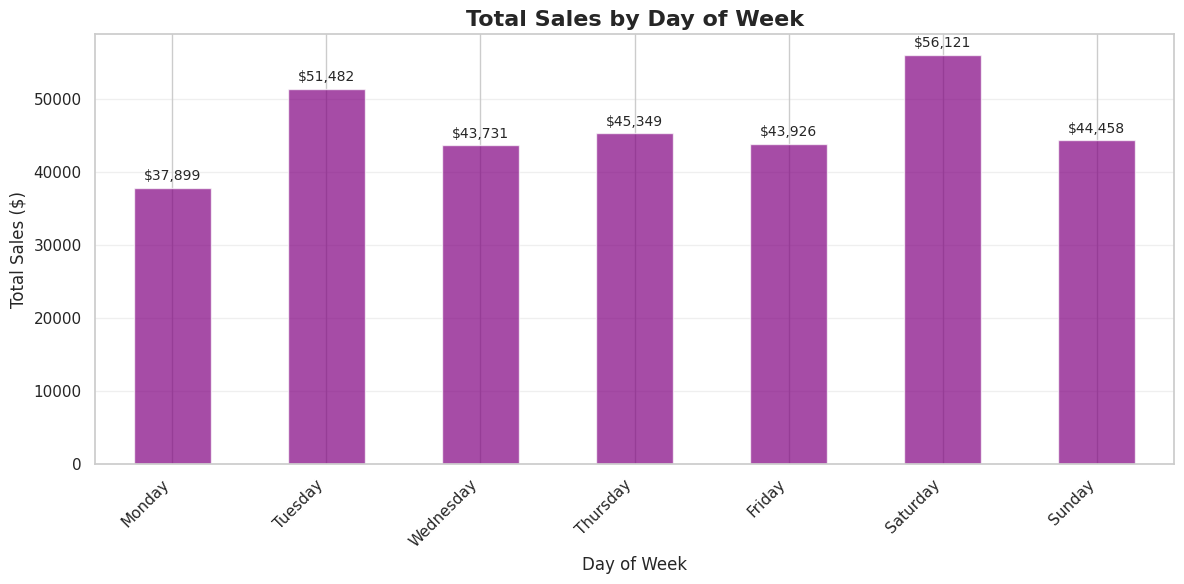


Sales by Day of Week:
Day_of_Week
Monday       37899.0780
Tuesday      51482.2455
Wednesday    43731.1350
Thursday     45349.2480
Friday       43926.3405
Saturday     56120.8095
Sunday       44457.8925
Name: Sales, dtype: float64


In [11]:
# Calculate total sales per day of week
sales_by_day = df.groupby('Day_of_Week')['Sales'].sum()

# Reorder days properly (Monday to Sunday)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_by_day = sales_by_day.reindex(day_order)

# Create the bar chart
plt.figure(figsize=(12, 6))
sales_by_day.plot(kind='bar', color='purple', alpha=0.7)
plt.title('Total Sales by Day of Week', fontsize=16, fontweight='bold')
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add value labels on top of bars
for i, v in enumerate(sales_by_day):
    plt.text(i, v + 1000, f'${v:,.0f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

print("\nSales by Day of Week:")
print(sales_by_day)

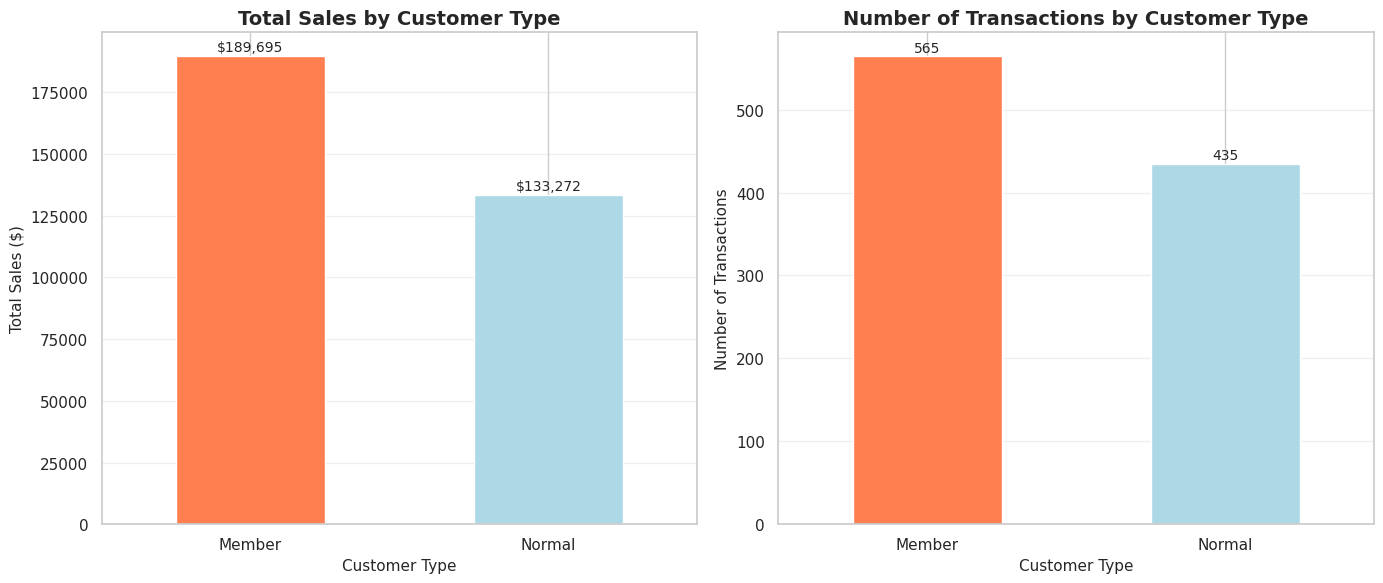


Sales by Customer Type:
Customer type
Member    189694.764
Normal    133271.985
Name: Sales, dtype: float64

Transactions by Customer Type:
Customer type
Member    565
Normal    435
dtype: int64

Average sale per customer type:
Customer type
Member    335.742945
Normal    306.372379
Name: Sales, dtype: float64


In [12]:
# Calculate sales by customer type
sales_by_customer = df.groupby('Customer type')['Sales'].sum().sort_values(ascending=False)
count_by_customer = df.groupby('Customer type').size()

# Create side-by-side comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Chart 1: Total sales
sales_by_customer.plot(kind='bar', ax=ax1, color=['coral', 'lightblue'])
ax1.set_title('Total Sales by Customer Type', fontsize=14, fontweight='bold')
ax1.set_xlabel('Customer Type', fontsize=11)
ax1.set_ylabel('Total Sales ($)', fontsize=11)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
ax1.grid(axis='y', alpha=0.3)

# Add value labels
for i, v in enumerate(sales_by_customer):
    ax1.text(i, v + 2000, f'${v:,.0f}', ha='center', fontsize=10)

# Chart 2: Number of transactions
count_by_customer.plot(kind='bar', ax=ax2, color=['coral', 'lightblue'])
ax2.set_title('Number of Transactions by Customer Type', fontsize=14, fontweight='bold')
ax2.set_xlabel('Customer Type', fontsize=11)
ax2.set_ylabel('Number of Transactions', fontsize=11)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
ax2.grid(axis='y', alpha=0.3)

# Add value labels
for i, v in enumerate(count_by_customer):
    ax2.text(i, v + 5, f'{v}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

print("\nSales by Customer Type:")
print(sales_by_customer)
print("\nTransactions by Customer Type:")
print(count_by_customer)
print("\nAverage sale per customer type:")
print(df.groupby('Customer type')['Sales'].mean())

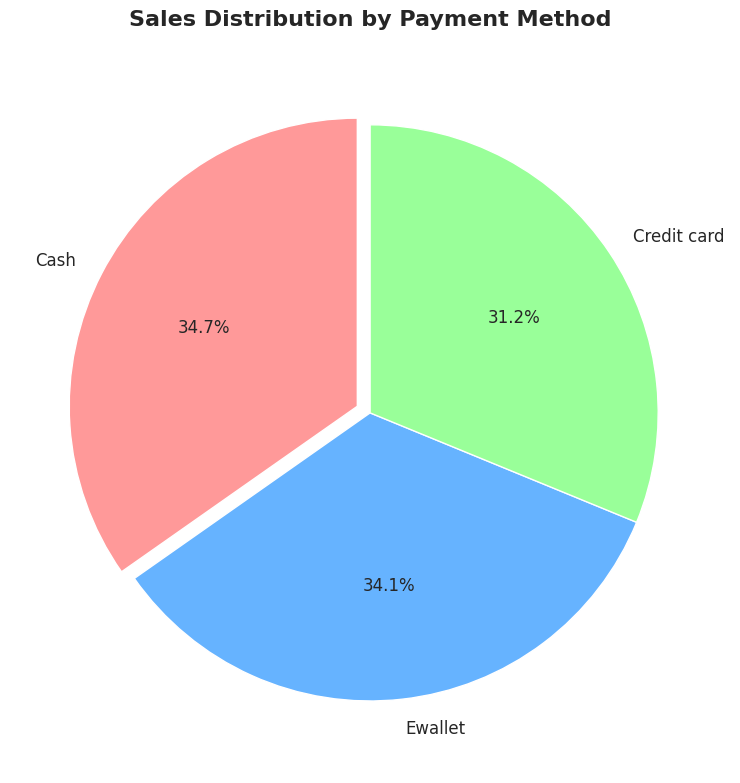


Sales by Payment Method:
Payment
Cash           112206.570
Ewallet        109993.107
Credit card    100767.072
Name: Sales, dtype: float64

Total: $322,966.75


In [13]:
# Calculate sales by payment method
sales_by_payment = df.groupby('Payment')['Sales'].sum().sort_values(ascending=False)

# Create pie chart
plt.figure(figsize=(10, 8))
colors = ['#ff9999', '#66b3ff', '#99ff99']
explode = (0.05, 0, 0)  # Slightly separate the largest slice

plt.pie(sales_by_payment, labels=sales_by_payment.index, autopct='%1.1f%%', 
        startangle=90, colors=colors, explode=explode, textprops={'fontsize': 12})
plt.title('Sales Distribution by Payment Method', fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

print("\nSales by Payment Method:")
print(sales_by_payment)
print(f"\nTotal: ${sales_by_payment.sum():,.2f}")

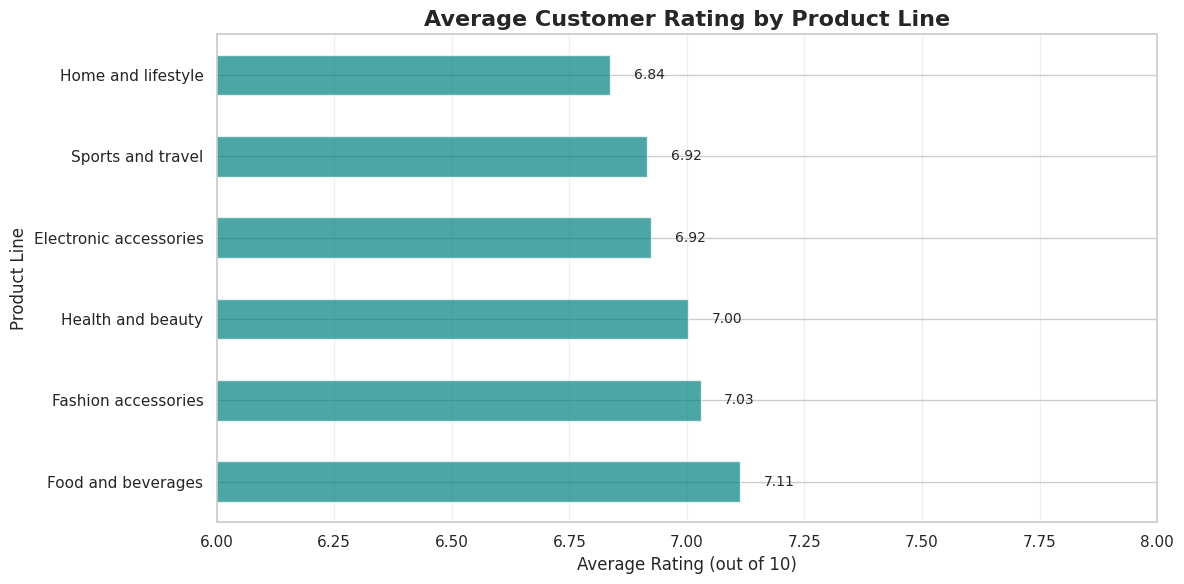


Average Rating by Product Line:
Product line
Food and beverages        7.113218
Fashion accessories       7.029213
Health and beauty         7.003289
Electronic accessories    6.924706
Sports and travel         6.916265
Home and lifestyle        6.837500
Name: Rating, dtype: float64

Overall average rating: 6.97


In [14]:
# Calculate average rating per product line
rating_by_product = df.groupby('Product line')['Rating'].mean().sort_values(ascending=False)

# Create horizontal bar chart
plt.figure(figsize=(12, 6))
rating_by_product.plot(kind='barh', color='teal', alpha=0.7)
plt.title('Average Customer Rating by Product Line', fontsize=16, fontweight='bold')
plt.xlabel('Average Rating (out of 10)', fontsize=12)
plt.ylabel('Product Line', fontsize=12)
plt.xlim(6, 8)  # Focus on the relevant range
plt.grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(rating_by_product):
    plt.text(v + 0.05, i, f'{v:.2f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

print("\nAverage Rating by Product Line:")
print(rating_by_product)
print(f"\nOverall average rating: {df['Rating'].mean():.2f}")

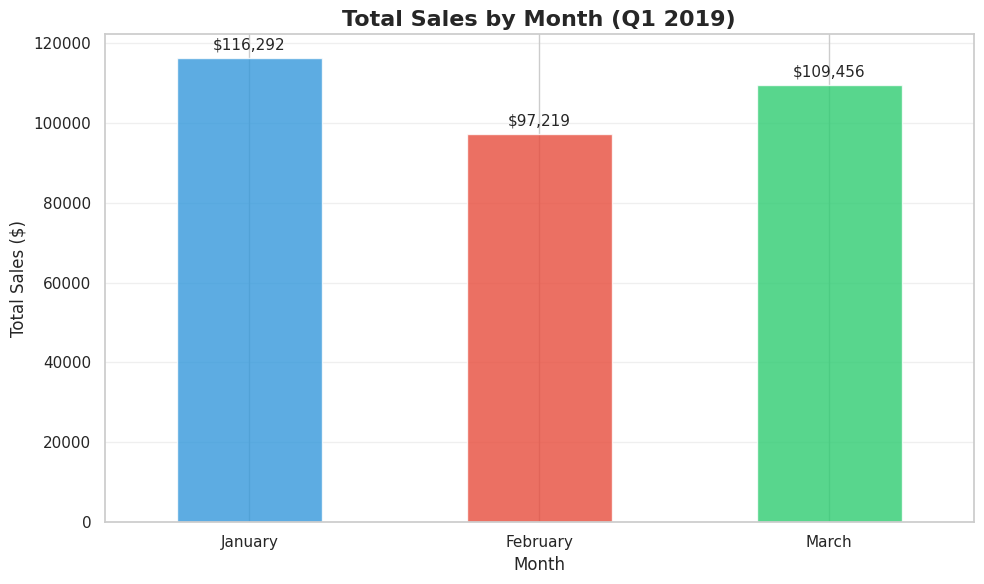


Sales by Month:
Month_Name
January     116291.868
February     97219.374
March       109455.507
Name: Sales, dtype: float64

Growth from Jan to Mar: -5.9%


In [15]:
# Calculate sales by month
monthly_sales = df.groupby('Month_Name')['Sales'].sum()

# Reorder months properly
month_order = ['January', 'February', 'March']
monthly_sales = monthly_sales.reindex(month_order)

# Create bar chart
plt.figure(figsize=(10, 6))
colors_months = ['#3498db', '#e74c3c', '#2ecc71']
monthly_sales.plot(kind='bar', color=colors_months, alpha=0.8)
plt.title('Total Sales by Month (Q1 2019)', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

# Add value labels
for i, v in enumerate(monthly_sales):
    plt.text(i, v + 2000, f'${v:,.0f}', ha='center', fontsize=11)

plt.tight_layout()
plt.show()

print("\nSales by Month:")
print(monthly_sales)
print(f"\nGrowth from Jan to Mar: {((monthly_sales['March'] - monthly_sales['January']) / monthly_sales['January'] * 100):.1f}%")

In [16]:
# Get top 10 sales
top_sales = df.nlargest(10, 'Sales')[['Invoice ID', 'Branch', 'Product line', 'Quantity', 'Sales', 'Date', 'Customer type']]

print("Top 10 Highest Sales Transactions:\n")
print(top_sales.to_string(index=False))
print(f"\nTotal from top 10: ${top_sales['Sales'].sum():,.2f}")
print(f"Percentage of total revenue: {(top_sales['Sales'].sum() / df['Sales'].sum() * 100):.2f}%")

Top 10 Highest Sales Transactions:

 Invoice ID Branch        Product line  Quantity    Sales       Date Customer type
860-79-0874   Giza Fashion accessories        10 1042.650 2019-02-15        Member
687-47-8271   Alex Fashion accessories        10 1039.290 2019-02-08        Normal
283-26-5248   Giza  Food and beverages        10 1034.460 2019-01-30        Member
751-41-9720   Giza  Home and lifestyle        10 1023.750 2019-01-12        Normal
303-96-2227  Cairo  Home and lifestyle        10 1022.490 2019-03-02        Normal
744-16-7898  Cairo  Home and lifestyle        10 1022.385 2019-01-15        Normal
271-88-8734   Giza Fashion accessories        10 1020.705 2019-02-08        Member
234-65-2137   Giza  Home and lifestyle        10 1003.590 2019-01-16        Normal
554-42-2417   Giza   Sports and travel        10 1002.120 2019-01-09        Normal
325-77-6186   Alex  Home and lifestyle        10  951.825 2019-03-08        Member

Total from top 10: $10,163.27
Percentage of total 

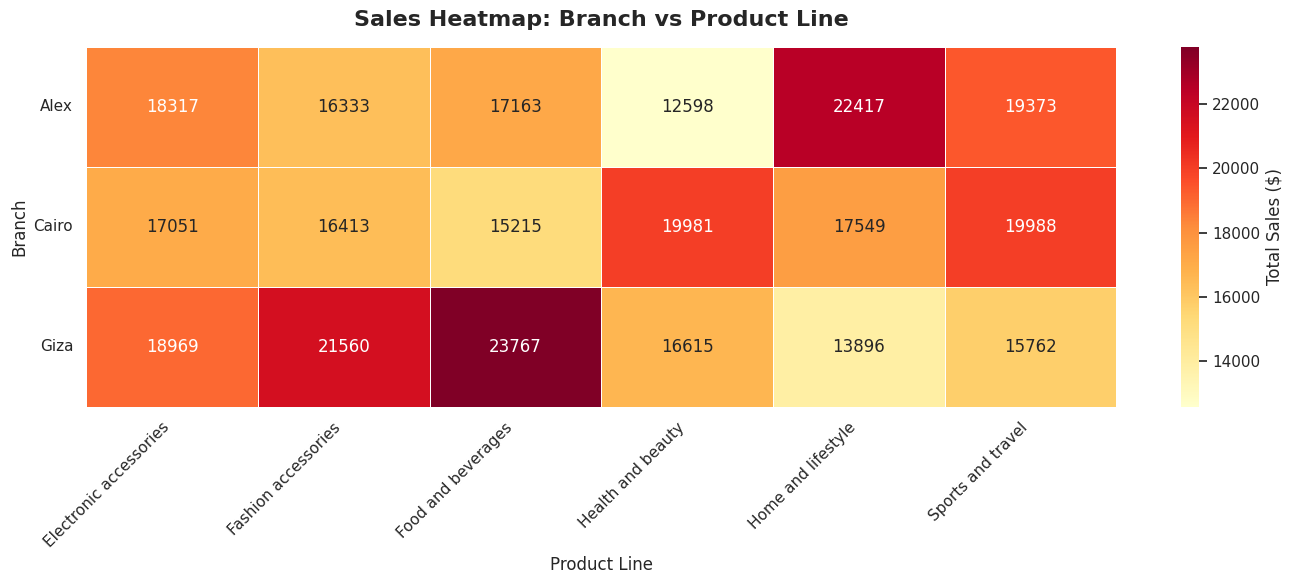


Sales by Branch and Product Line:
Product line  Electronic accessories  Fashion accessories  Food and beverages  \
Branch                                                                          
Alex                      18317.1135           16332.5085          17163.1005   
Cairo                     17051.4435           16413.3165          15214.8885   
Giza                      18968.9745           21560.0700          23766.8550   

Product line  Health and beauty  Home and lifestyle  Sports and travel  
Branch                                                                  
Alex                  12597.753          22417.1955         19372.6995  
Cairo                 19980.660          17549.1645         19988.1990  
Giza                  16615.326          13895.5530         15761.9280  


In [17]:
# Create a pivot table: branches as rows, product lines as columns
sales_heatmap = df.pivot_table(values='Sales', index='Branch', columns='Product line', aggfunc='sum')

# Create the heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(sales_heatmap, annot=True, fmt='.0f', cmap='YlOrRd', linewidths=0.5, cbar_kws={'label': 'Total Sales ($)'})
plt.title('Sales Heatmap: Branch vs Product Line', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Product Line', fontsize=12)
plt.ylabel('Branch', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("\nSales by Branch and Product Line:")
print(sales_heatmap)

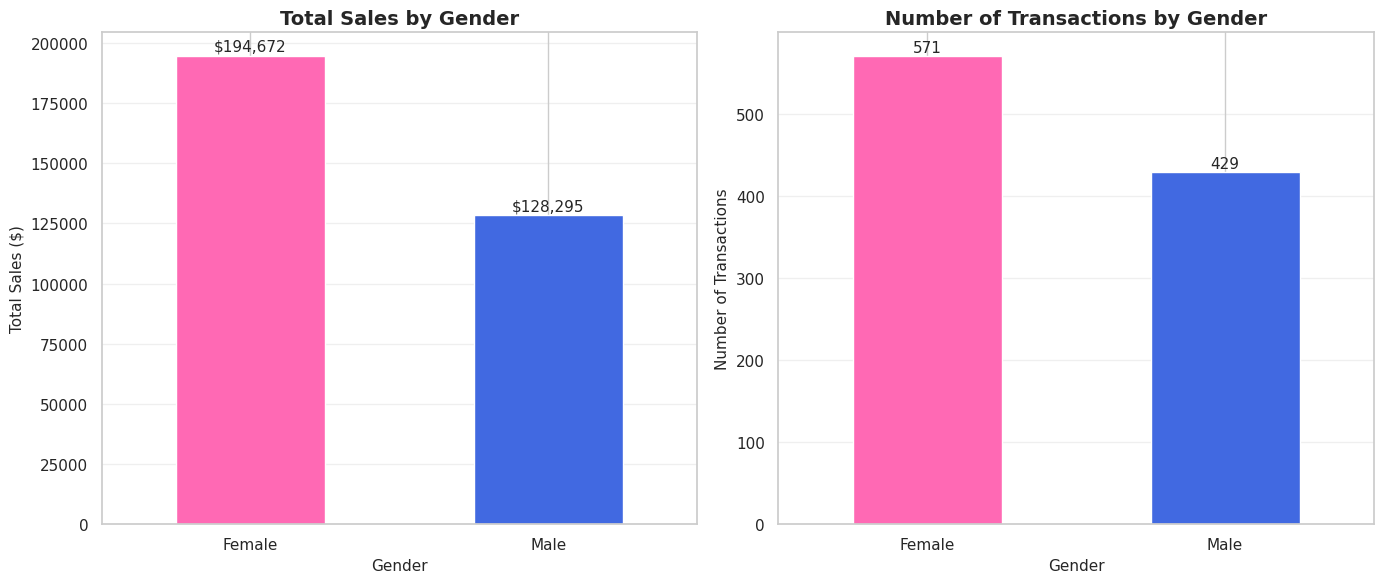


Sales by Gender:
Gender
Female    194671.8375
Male      128294.9115
Name: Sales, dtype: float64

Transactions by Gender:
Gender
Female    571
Male      429
dtype: int64

Average sale - Female: $340.93
Average sale - Male: $299.06


In [18]:
# Calculate sales by gender
sales_by_gender = df.groupby('Gender')['Sales'].sum()
count_by_gender = df.groupby('Gender').size()

# Create side-by-side comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Chart 1: Total sales by gender
sales_by_gender.plot(kind='bar', ax=ax1, color=['#FF69B4', '#4169E1'])
ax1.set_title('Total Sales by Gender', fontsize=14, fontweight='bold')
ax1.set_xlabel('Gender', fontsize=11)
ax1.set_ylabel('Total Sales ($)', fontsize=11)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
ax1.grid(axis='y', alpha=0.3)

for i, v in enumerate(sales_by_gender):
    ax1.text(i, v + 2000, f'${v:,.0f}', ha='center', fontsize=11)

# Chart 2: Number of transactions by gender
count_by_gender.plot(kind='bar', ax=ax2, color=['#FF69B4', '#4169E1'])
ax2.set_title('Number of Transactions by Gender', fontsize=14, fontweight='bold')
ax2.set_xlabel('Gender', fontsize=11)
ax2.set_ylabel('Number of Transactions', fontsize=11)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
ax2.grid(axis='y', alpha=0.3)

for i, v in enumerate(count_by_gender):
    ax2.text(i, v + 5, f'{v}', ha='center', fontsize=11)

plt.tight_layout()
plt.show()

print("\nSales by Gender:")
print(sales_by_gender)
print("\nTransactions by Gender:")
print(count_by_gender)
print(f"\nAverage sale - Female: ${df[df['Gender']=='Female']['Sales'].mean():.2f}")
print(f"Average sale - Male: ${df[df['Gender']=='Male']['Sales'].mean():.2f}")

<Figure size 1400x700 with 0 Axes>

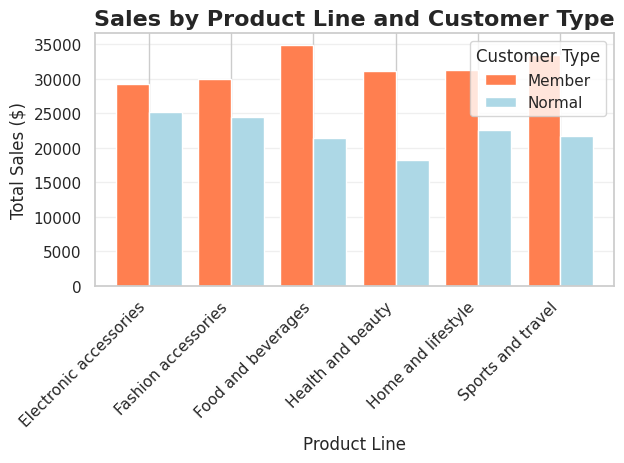


Sales by Product Line and Customer Type:
Customer type               Member      Normal
Product line                                  
Electronic accessories  29194.7565  25142.7750
Fashion accessories     29926.5645  24379.3305
Food and beverages      34822.3890  21322.4550
Health and beauty       31036.8240  18156.9150
Home and lifestyle      31317.2790  22544.6340
Sports and travel       33396.9510  21725.8755


In [19]:
# Create a grouped bar chart
product_customer = df.groupby(['Product line', 'Customer type'])['Sales'].sum().unstack()

# Create the chart
plt.figure(figsize=(14, 7))
product_customer.plot(kind='bar', width=0.8, color=['coral', 'lightblue'])
plt.title('Sales by Product Line and Customer Type', fontsize=16, fontweight='bold')
plt.xlabel('Product Line', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Customer Type', fontsize=11)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nSales by Product Line and Customer Type:")
print(product_customer)

In [20]:
print("="*70)
print(" "*15 + "SUPERMARKET SALES ANALYSIS REPORT")
print(" "*20 + "Q1 2019 (Jan - Mar)")
print("="*70)

print("\n📊 OVERALL PERFORMANCE")
print("-" * 70)
print(f"Total Revenue:           ${df['Sales'].sum():,.2f}")
print(f"Total Transactions:      {len(df):,}")
print(f"Average Transaction:     ${df['Sales'].mean():.2f}")
print(f"Date Range:              {df['Date'].min().strftime('%B %d, %Y')} to {df['Date'].max().strftime('%B %d, %Y')}")

print("\n🏆 TOP PERFORMERS")
print("-" * 70)
top_branch = df.groupby('Branch')['Sales'].sum().idxmax()
print(f"Best Branch:             {top_branch} (${df.groupby('Branch')['Sales'].sum().max():,.2f})")

top_product = df.groupby('Product line')['Sales'].sum().idxmax()
print(f"Best Product Line:       {top_product} (${df.groupby('Product line')['Sales'].sum().max():,.2f})")

top_day = df.groupby('Day_of_Week')['Sales'].sum().idxmax()
print(f"Busiest Day:             {top_day}")

best_rated = df.groupby('Product line')['Rating'].mean().idxmax()
print(f"Highest Rated Product:   {best_rated} ({df.groupby('Product line')['Rating'].mean().max():.2f}/10)")

print("\n👥 CUSTOMER INSIGHTS")
print("-" * 70)
member_sales = df[df['Customer type']=='Member']['Sales'].sum()
normal_sales = df[df['Customer type']=='Normal']['Sales'].sum()
print(f"Member Sales:            ${member_sales:,.2f} ({member_sales/df['Sales'].sum()*100:.1f}%)")
print(f"Normal Sales:            ${normal_sales:,.2f} ({normal_sales/df['Sales'].sum()*100:.1f}%)")
print(f"Member Avg Transaction:  ${df[df['Customer type']=='Member']['Sales'].mean():.2f}")
print(f"Normal Avg Transaction:  ${df[df['Customer type']=='Normal']['Sales'].mean():.2f}")

print("\n💳 PAYMENT PREFERENCES")
print("-" * 70)
for payment in df['Payment'].unique():
    payment_total = df[df['Payment']==payment]['Sales'].sum()
    payment_pct = payment_total / df['Sales'].sum() * 100
    print(f"{payment:20} ${payment_total:>10,.2f} ({payment_pct:>5.1f}%)")

print("\n📈 MONTHLY BREAKDOWN")
print("-" * 70)
for month in ['January', 'February', 'March']:
    if month in df['Month_Name'].values:
        month_sales = df[df['Month_Name']==month]['Sales'].sum()
        month_trans = len(df[df['Month_Name']==month])
        print(f"{month:15} ${month_sales:>10,.2f} ({month_trans:>4} transactions)")

print("\n⭐ CUSTOMER SATISFACTION")
print("-" * 70)
print(f"Overall Avg Rating:      {df['Rating'].mean():.2f}/10")
print(f"Highest Rating:          {df['Rating'].max():.1f}/10")
print(f"Lowest Rating:           {df['Rating'].min():.1f}/10")

print("\n" + "="*70)
print(" "*22 + "END OF REPORT")
print("="*70)

               SUPERMARKET SALES ANALYSIS REPORT
                    Q1 2019 (Jan - Mar)

📊 OVERALL PERFORMANCE
----------------------------------------------------------------------
Total Revenue:           $322,966.75
Total Transactions:      1,000
Average Transaction:     $322.97
Date Range:              January 01, 2019 to March 30, 2019

🏆 TOP PERFORMERS
----------------------------------------------------------------------
Best Branch:             Giza ($110,568.71)
Best Product Line:       Food and beverages ($56,144.84)
Busiest Day:             Saturday
Highest Rated Product:   Food and beverages (7.11/10)

👥 CUSTOMER INSIGHTS
----------------------------------------------------------------------
Member Sales:            $189,694.76 (58.7%)
Normal Sales:            $133,271.98 (41.3%)
Member Avg Transaction:  $335.74
Normal Avg Transaction:  $306.37

💳 PAYMENT PREFERENCES
----------------------------------------------------------------------
Ewallet              $109,993.11 ( 3

In [21]:
# Save cleaned data with new columns
df.to_csv('SuperMarket_Sales_Analyzed.csv', index=False)
print("✅ Cleaned and analyzed data saved as 'SuperMarket_Sales_Analyzed.csv'")

# Create a summary statistics file
summary = {
    'Metric': [
        'Total Revenue',
        'Total Transactions',
        'Average Sale',
        'Top Branch',
        'Top Product',
        'Best Day',
        'Most Popular Payment'
    ],
    'Value': [
        f"${df['Sales'].sum():,.2f}",
        f"{len(df):,}",
        f"${df['Sales'].mean():.2f}",
        df.groupby('Branch')['Sales'].sum().idxmax(),
        df.groupby('Product line')['Sales'].sum().idxmax(),
        df.groupby('Day_of_Week')['Sales'].sum().idxmax(),
        df.groupby('Payment')['Sales'].sum().idxmax()
    ]
}

summary_df = pd.DataFrame(summary)
summary_df.to_csv('Sales_Summary.csv', index=False)
print("✅ Summary report saved as 'Sales_Summary.csv'")

print("\n📁 Files created in your repository:")
print("   1. SuperMarket_Sales_Analyzed.csv (full data with new columns)")
print("   2. Sales_Summary.csv (key metrics summary)")

✅ Cleaned and analyzed data saved as 'SuperMarket_Sales_Analyzed.csv'
✅ Summary report saved as 'Sales_Summary.csv'

📁 Files created in your repository:
   1. SuperMarket_Sales_Analyzed.csv (full data with new columns)
   2. Sales_Summary.csv (key metrics summary)
